In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

In [2]:
data = pd.read_csv('Sold_And_Stats_Edited_New_a.csv')
data.head()

,Listing Number,Street Number,Street Number Modifier,Street Direction,Street Name,Street Suffix,Street Post Direction,City,State,Zip Code,...,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type,Selling Date
0,825199,1118,NaN,NaN,Alki,Ave,SW,Seattle,WA,98116,...,0.0,3,4080.0,1900000.0,1500000.0,78.947368,1000,10 - 1 Story,House,5/1/2017 0:00
1,902993,12805,NaN,NaN,78th,Ave,S,Seattle,WA,98178,...,0.0,0,10500.0,159000.0,155000.0,97.484277,580,10 - 1 Story,House,3/21/2018 0:00
2,1072254,810,NaN,NaN,34th,Ave,NaN,Seattle,WA,98122,...,0.0,0,4600.0,650000.0,650000.0,100.000000,1060,10 - 1 Story,House,5/5/2017 0:00
3,1106354,8735,NaN,NaN,1st,Ave,NW,Seattle,WA,98117,...,0.0,0,6350.0,410000.0,448000.0,109.268293,870,10 - 1 Story,House,5/16/2017 0:00
4,1110111,10403,NaN,NaN,15th,Ave,NaN,Seattle,WA,98125,...,0.0,0,6120.0,498000.0,475000.0,95.381526,1550,10 - 1 Story,House,5/15/2017 0:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57654 entries, 0 to 57653
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Listing Number                 57654 non-null  int64  
 1   Street Number                  57654 non-null  int64  
 2   Street Number Modifier         2257 non-null   object 
 3   Street Direction               17249 non-null  object 
 4   Street Name                    57654 non-null  object 
 5   Street Suffix                  55733 non-null  object 
 6   Street Post Direction          34223 non-null  object 
 7   City                           57654 non-null  object 
 8   State                          57654 non-null  object 
 9   Zip Code                       57654 non-null  int64  
 10  Area                           57654 non-null  object 
 11  Bathrooms                      57654 non-null  float64
 12  Bedrooms                       57654 non-null 

In [4]:
#Drop un-needed columns

data.drop(['Listing Number', 'Street Number', 'Street Number Modifier', 'Street Direction', 'Street Name', 'Street Suffix', 'Street Post Direction', 'City', 'State', 'Area', 'Selling Date','Style Code'], axis=1,inplace=True)

In [5]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
0,98116,0.0,3,4080.0,1900000.0,1500000.0,78.947368,1000,House
1,98178,0.0,0,10500.0,159000.0,155000.0,97.484277,580,House
2,98122,0.0,0,4600.0,650000.0,650000.0,100.000000,1060,House
3,98117,0.0,0,6350.0,410000.0,448000.0,109.268293,870,House
4,98125,0.0,0,6120.0,498000.0,475000.0,95.381526,1550,House


In [6]:
data.dtypes

Zip Code                           int64
Bathrooms                        float64
Bedrooms                           int64
Lot Square Footage               float64
Listing Price                    float64
Selling Price                    float64
Sold to List Price Percentage    float64
Square Footage                     int64
Property Type                     object
dtype: object

In [7]:
#Data cleaning

data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
data.dropna(subset=["Bathrooms", "Bedrooms", "Listing Price"], how="all", inplace=True)

In [9]:
data.dropna(how='any', inplace=True)

In [10]:
data = data.fillna(0)

In [11]:
data[["Bathrooms", "Bedrooms", "Listing Price", "Selling Price"]] = data[["Bedrooms", "Bathrooms", "Listing Price", "Selling Price"]].apply(pd.to_numeric)

In [12]:
data = data.astype({"Bathrooms": int, "Bedrooms": int, "Listing Price": int, "Selling Price": int})

In [13]:
PropertyType = {'House': 1,
                'Condo': 2,
                'Townhouse': 3,
               }

In [14]:
data.replace({"Property Type": PropertyType}, regex=True, inplace=True)

In [15]:
data = data.astype({"Property Type": int})

In [16]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
0,98116,3,0,4080.0,1900000,1500000,78.947368,1000,1
1,98178,0,0,10500.0,159000,155000,97.484277,580,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,1


In [17]:
data.dtypes

Zip Code                           int64
Bathrooms                          int64
Bedrooms                           int64
Lot Square Footage               float64
Listing Price                      int64
Selling Price                      int64
Sold to List Price Percentage    float64
Square Footage                     int64
Property Type                      int64
dtype: object

In [18]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
0,98116,3,0,4080.0,1900000,1500000,78.947368,1000,1
1,98178,0,0,10500.0,159000,155000,97.484277,580,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,1


In [19]:
#DATA CLEANING

data['Listing Price'] = data['Listing Price'].round(decimals=2)

In [20]:
#Houses where bedroom is 0

data.loc[(data['Bedrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
0,98116,3,0,4080.0,1900000,1500000,78.947368,1000,1
1,98178,0,0,10500.0,159000,155000,97.484277,580,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,1


In [21]:
#Houses with 0 bathrooms

data.loc[(data['Bathrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
1,98178,0,0,10500.0,159000,155000,97.484277,580,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,1
7,98125,0,0,7563.0,399000,370000,92.731830,700,1


In [22]:
#Check the outliers (most expensive)

data.sort_values(by=['Listing Price'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
32936,98122,4,6,50705.0,35000000,30750000,87.857143,9791,1
13113,98112,4,4,32856.0,16750000,14275000,85.223881,5612,1
31817,98112,4,3,64981.0,15000000,13750000,91.666667,6750,1
13164,98102,5,6,31000.0,15000000,10960000,73.066667,11000,1
23147,98105,4,3,67106.0,15000000,14850000,99.000000,4620,1


In [23]:
#Check the outliers (cheapest)

data.loc[(data['Listing Price'] > 0)].sort_values(by=['Listing Price']).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
32960,98102,0,0,4064.0,39950,38000,95.118899,168,2
32967,98109,0,0,7200.0,40000,40000,100.000000,185,2
34810,98168,1,1,0.0,67500,73000,108.148148,680,2
4553,98118,0,0,5715.0,95000,253000,266.315789,1500,1
44523,98146,1,1,37800.0,99950,100600,100.650325,492,2


In [24]:
#Check the outliers (widest sqft_living)

data.sort_values(by=['Square Footage'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
13161,98112,7,6,16874.0,7125000,6400000,89.824561,12280,1
13170,98177,8,8,194167.0,4800000,3600000,75.000000,11240,1
13164,98102,5,6,31000.0,15000000,10960000,73.066667,11000,1
32943,98112,5,6,10000.0,3995000,4850000,121.401752,10416,1
32949,98104,0,0,10.0,8000000,7500000,93.750000,9876,2


In [25]:
#Drop 0 values from rows

data = data[(data[['Bathrooms','Bedrooms','Square Footage']] != 0).all(axis=1)]

In [26]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Property Type
132,98126,2,1,6120.0,349950,415000,118.588370,890,1
133,98102,1,1,12269.0,1800000,1800000,100.000000,644,1
134,98136,2,1,4383.0,525000,525000,100.000000,720,1
135,98177,1,1,3333.0,449000,429500,95.657016,550,1
136,98118,3,1,7920.0,299950,299950,100.000000,1320,1


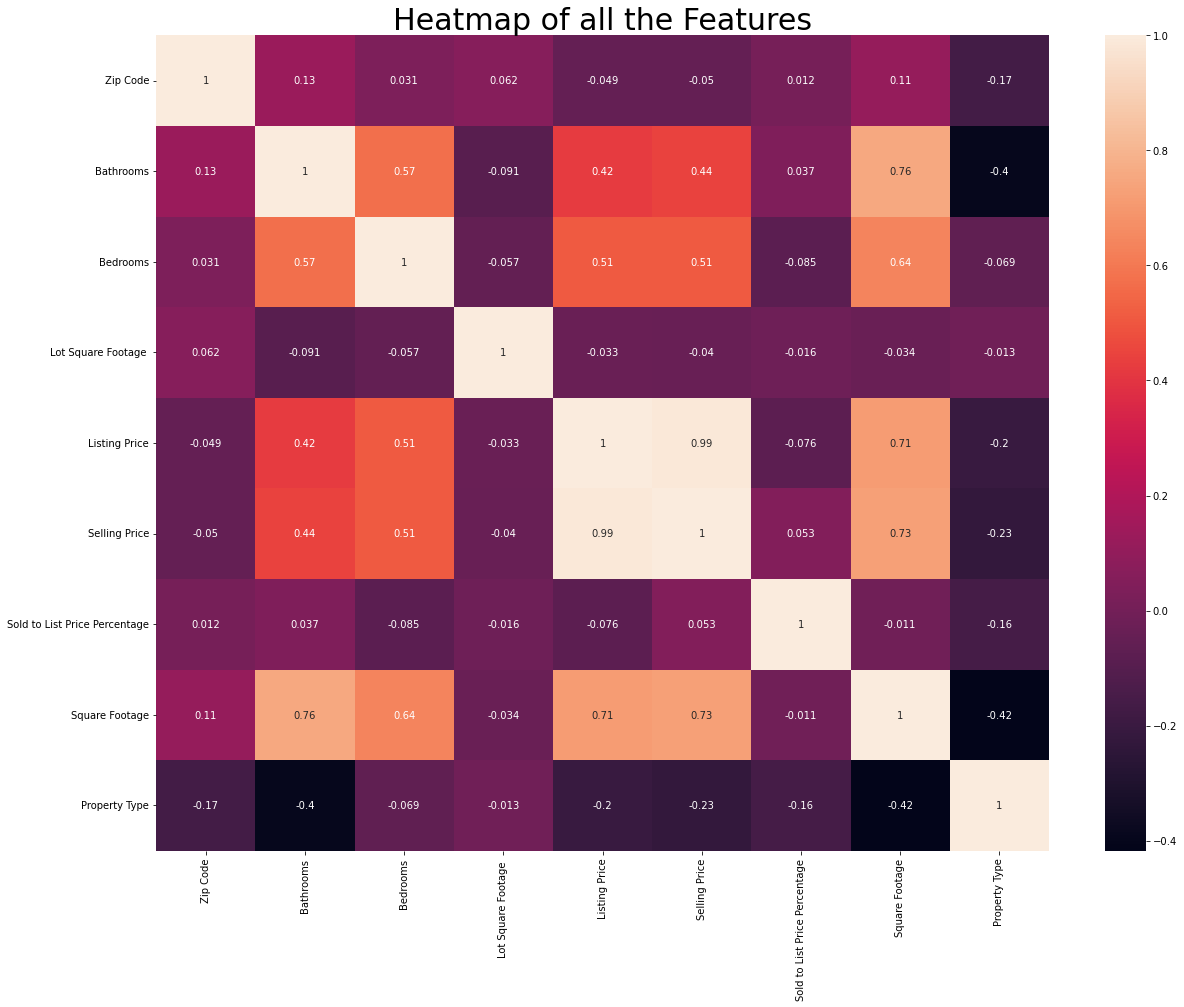

In [27]:
#Correlation Check

features = data
encoder = LabelEncoder()
features['Zip Code'] = encoder.fit_transform(features['Zip Code'])

plt.figure(figsize=(20,15))
sns.heatmap(features.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 30);
plt.show()


In [28]:
#Split data to X for variable input, and y for target class

y = features['Selling Price']
X = features.drop(['Selling Price'],axis=1)

In [29]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
##### LINEAR REGRESSION MODEL #####

reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
reg_pred = list(reg.predict(X_test))
for i in reg_pred[0:10]:
  print('Prediction price of house', reg_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))
mse = mean_squared_error(y_test,reg_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9930842826774566
coef of determination testing  0.9855108079557873

Prediction price of house 1 : $ 2152211.825971588
Prediction price of house 2 : $ 691567.4964561757
Prediction price of house 3 : $ 744703.9693826361
Prediction price of house 4 : $ 851219.914802879
Prediction price of house 5 : $ 741933.9407319283
Prediction price of house 6 : $ 3134643.486891551
Prediction price of house 7 : $ 585674.6604139482
Prediction price of house 8 : $ 1517497.969299925
Prediction price of house 9 : $ 663120.2615905219
Prediction price of house 10 : $ 960761.054850621

Real price of house 1 : $ 2168000
Real price of house 2 : $ 650000
Real price of house 3 : $ 750000
Real price of house 4 : $ 850000
Real price of house 5 : $ 757000
Real price of house 6 : $ 3050000
Real price of house 7 : $ 585000
Real price of house 8 : $ 1525000
Real price of house 9 : $ 680000
Real price of house 10 : $ 965000

Mean Absolute Error:  18840.500041941756
Root Mean Square Error

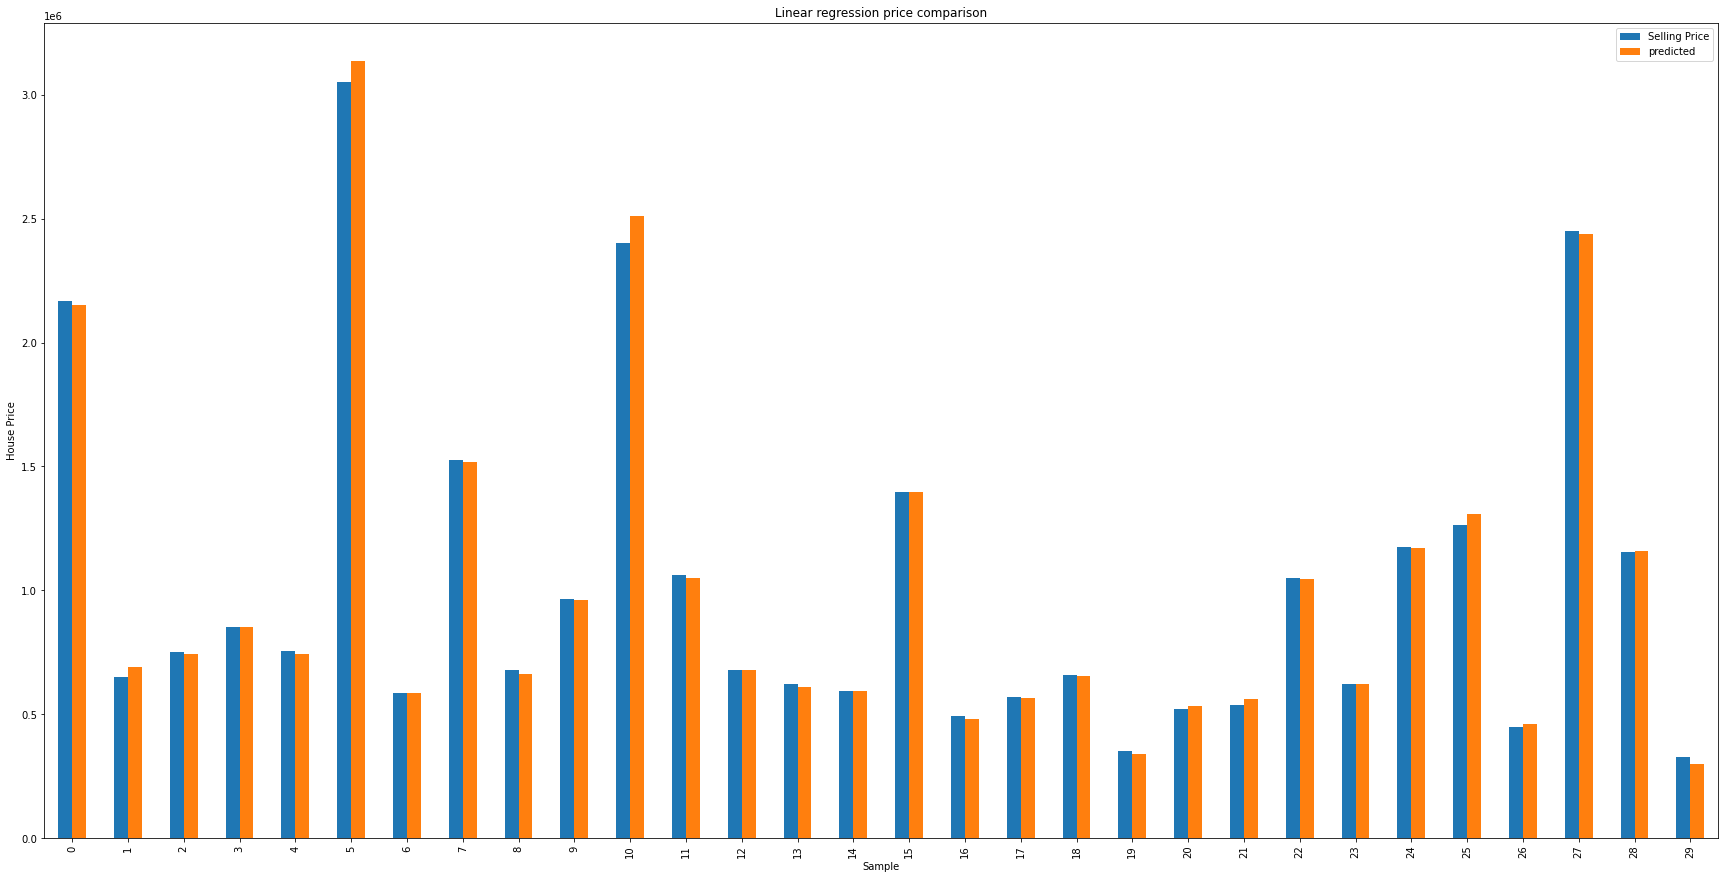

In [36]:
#VISUALIZE LINEAR REGRESSION MODEL

reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [32]:
##### DECISION TREE MODEL #####

dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = list(dt.predict(X_test))
for i in dt_pred[0:10]:
  print('Prediction price of house', dt_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))
mse = mean_squared_error(y_test,dt_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9999998943206031
coef of determination testing  0.9456497860546369

prediction
Prediction price of house 1 : $ 2185350.0
Prediction price of house 2 : $ 650000.0
Prediction price of house 3 : $ 750000.0
Prediction price of house 4 : $ 849972.7469879518
Prediction price of house 5 : $ 756370.0
Prediction price of house 6 : $ 2995000.0
Prediction price of house 7 : $ 584991.0256410256
Prediction price of house 8 : $ 1525000.0
Prediction price of house 9 : $ 680000.0
Prediction price of house 10 : $ 960000.0

Real price of house 1 : $ 2168000
Real price of house 2 : $ 650000
Real price of house 3 : $ 750000
Real price of house 4 : $ 850000
Real price of house 5 : $ 757000
Real price of house 6 : $ 3050000
Real price of house 7 : $ 585000
Real price of house 8 : $ 1525000
Real price of house 9 : $ 680000
Real price of house 10 : $ 965000

Mean Absolute Error:  32.61782192477342
Root Mean Square Error :  139165.5656763125


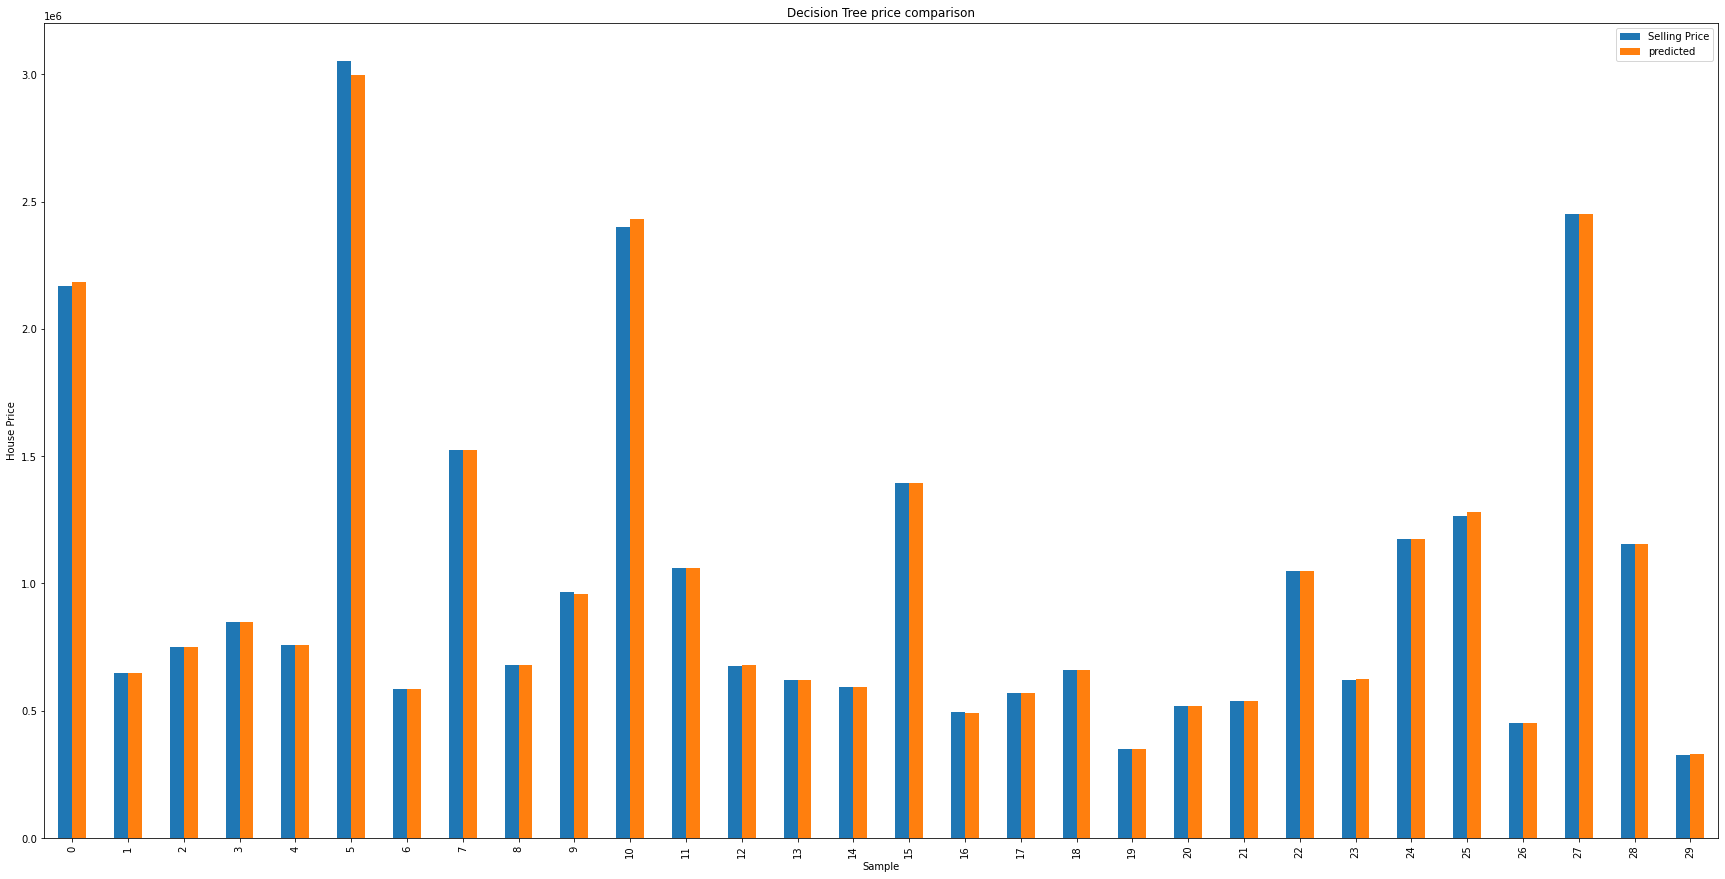

In [33]:
#VISUALIZE DECISION TREE

dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [34]:
##### RANDOM FOREST MODEL #####

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = list(rf.predict(X_test))
for i in rf_pred[0:10]:
  print('Prediction price of house', rf_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

mse = mean_squared_error(y_test,rf_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9995517974614573
coef of determination testing  0.9420456739194847

prediction
Prediction price of house 1 : $ 2174231.0
Prediction price of house 2 : $ 649900.0
Prediction price of house 3 : $ 750035.0
Prediction price of house 4 : $ 850000.0
Prediction price of house 5 : $ 756566.16
Prediction price of house 6 : $ 3061942.0
Prediction price of house 7 : $ 584999.0
Prediction price of house 8 : $ 1525280.0
Prediction price of house 9 : $ 680178.03
Prediction price of house 10 : $ 964834.5

Real price of house 1 : $ 2168000
Real price of house 2 : $ 650000
Real price of house 3 : $ 750000
Real price of house 4 : $ 850000
Real price of house 5 : $ 757000
Real price of house 6 : $ 3050000
Real price of house 7 : $ 585000
Real price of house 8 : $ 1525000
Real price of house 9 : $ 680000
Real price of house 10 : $ 965000

Mean Absolute Error:  989.2509459424458
Root Mean Square Error :  143705.73168581392


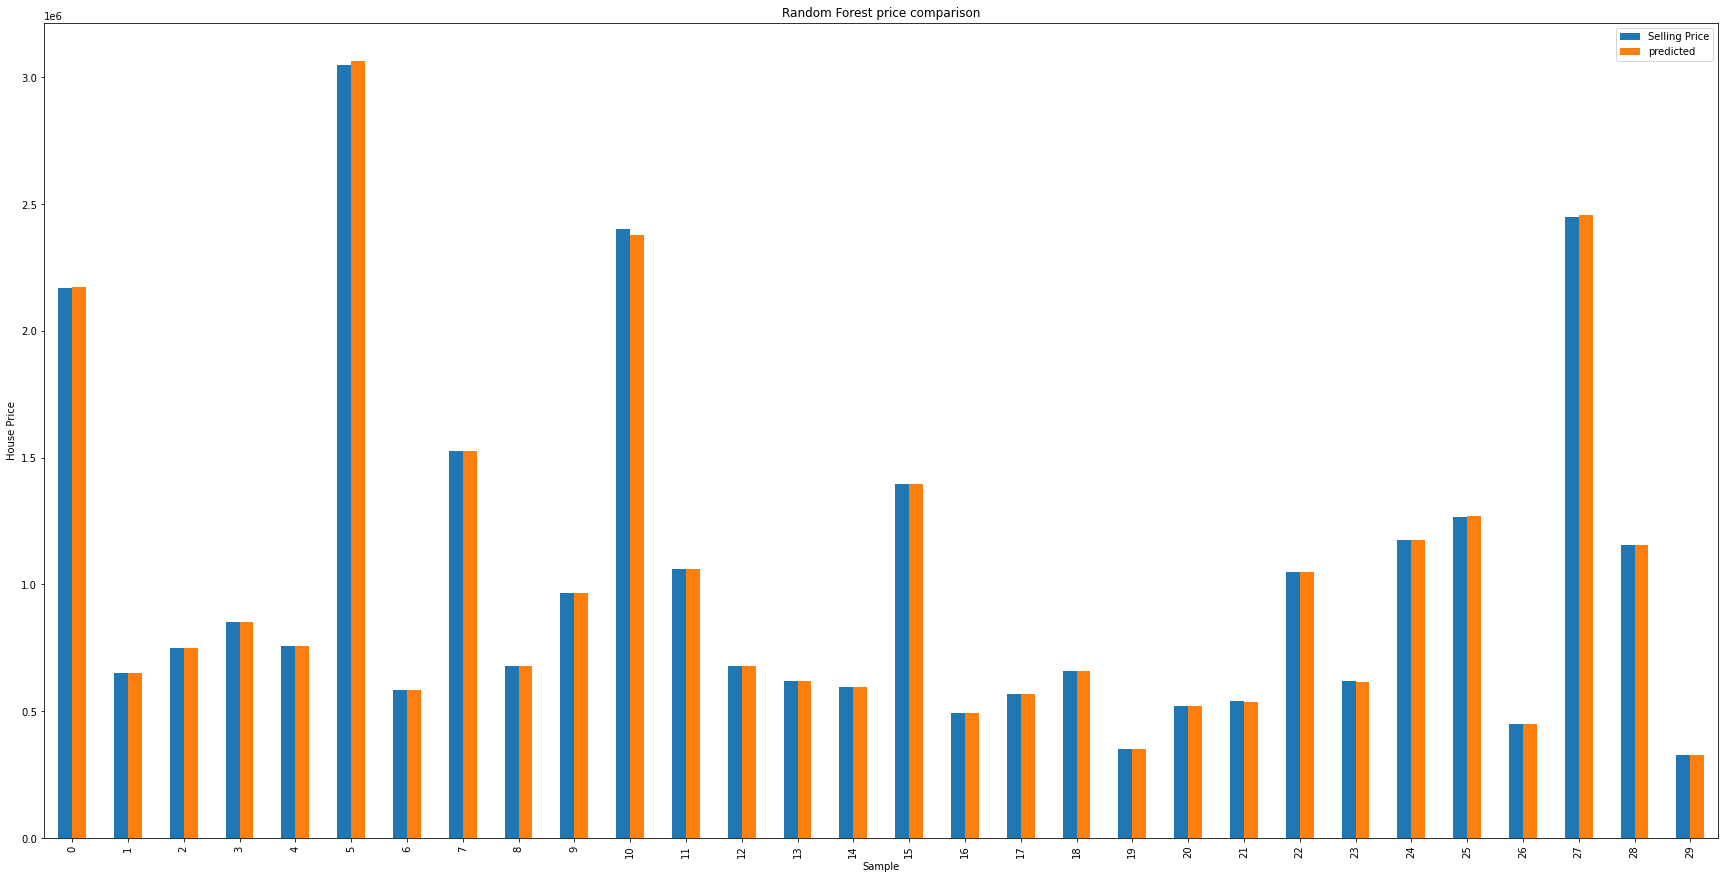

In [35]:
#VISUALIZE RANDOM FOREST MODEL

rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Random Forest price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()